In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as  web
import matplotlib.pyplot as pp
from datetime import datetime, timedelta, date

In [2]:
start = datetime(1970,1,2)
end = datetime(2021,12,31)

df_SPY = pdr.DataReader('SPY','yahoo',start,end) #미국 주식
df_TLT = pdr.DataReader('TLT','yahoo',start,end) #미국 채권
df_GLD = pdr.DataReader('GLD','yahoo',start,end) #금
df_IEF = pdr.DataReader('IEF','yahoo',start,end) #미국 중기 국채
df_DBC = pdr.DataReader('DBC','yahoo',start,end) #원자재

In [3]:
#LOG 수익률 계산
SPY_PROFIT = df_SPY['Close'].pct_change()*100
SPY_PROFIT.iloc[0] = 0

TLT_PROFIT = df_TLT['Close'].pct_change()*100
TLT_PROFIT.iloc[0] = 0

GLD_PROFIT = df_GLD['Close'].pct_change()*100
GLD_PROFIT.iloc[0] = 0

IEF_PROFIT = df_IEF['Close'].pct_change()*100
IEF_PROFIT.iloc[0] = 0

DBC_PROFIT = df_DBC['Close'].pct_change()*100
DBC_PROFIT.iloc[0] = 0

In [4]:
SPY_LOG_PROFIT = np.log(SPY_PROFIT +1)
TLT_LOG_PROFIT = np.log(TLT_PROFIT +1)
GLD_LOG_PROFIT = np.log(GLD_PROFIT +1)
IEF_LOG_PROFIT = np.log(IEF_PROFIT +1)
DBC_LOG_PROFIT = np.log(DBC_PROFIT +1)

C:\Users\sjo20\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
#LOG 누적 수익률
SPY_LOG_PROFIT_ACC = SPY_LOG_PROFIT.cumsum()
TLT_LOG_PROFIT_ACC = TLT_LOG_PROFIT.cumsum()
GLD_LOG_PROFIT_ACC = GLD_LOG_PROFIT.cumsum()
IEF_LOG_PROFIT_ACC = IEF_LOG_PROFIT.cumsum()
DBC_LOG_PROFIT_ACC = DBC_LOG_PROFIT.cumsum()

In [6]:
pf = (SPY_LOG_PROFIT_ACC * 0.2) + (TLT_LOG_PROFIT_ACC * 0.2) +(GLD_LOG_PROFIT_ACC * 0.2) +(IEF_LOG_PROFIT_ACC * 0.22)+(DBC_LOG_PROFIT_ACC * 0.22)

pf = pf.dropna()
pf

Date
2006-02-06   -24.842816
2006-02-08   -25.419766
2006-02-09   -24.966742
2006-02-14   -25.398797
2006-02-16   -24.801973
                ...    
2021-12-23   -21.143077
2021-12-27   -20.694085
2021-12-28   -20.975384
2021-12-30   -20.943098
2021-12-31   -21.030995
Name: Close, Length: 2497, dtype: float64

In [11]:
pf_data = (df_SPY['Close']*0.3) + (df_TLT['Close']*0.4) + (df_GLD['Close']*0.075) + (df_IEF['Close']*0.15)+ (df_DBC['Close']*0.075)

pf_data = pf_data.dropna()
pf_data

Date
2006-02-06     92.900499
2006-02-07     92.166001
2006-02-08     92.426251
2006-02-09     92.657002
2006-02-10     92.353502
                 ...    
2021-12-27    234.305755
2021-12-28    233.891995
2021-12-29    233.342252
2021-12-30    233.578498
2021-12-31    233.394499
Name: Close, Length: 4005, dtype: float64

In [12]:
window = 20
max_window = pf_data.rolling(window, min_periods=1).max()
dd=((pf_data/max_window)-1)*100
mdd = dd.rolling(window,min_periods=1 ).min()

print(mdd)

Date
2006-02-06    0.000000
2006-02-07   -0.790629
2006-02-08   -0.790629
2006-02-09   -0.790629
2006-02-10   -0.790629
                ...   
2021-12-27   -2.164648
2021-12-28   -2.164648
2021-12-29   -2.164648
2021-12-30   -1.904448
2021-12-31   -1.904448
Name: Close, Length: 4005, dtype: float64


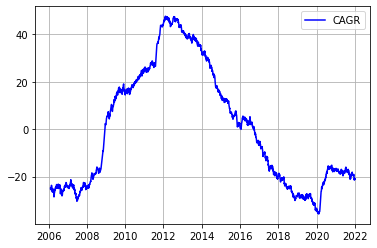

In [13]:
plt.plot(pf.index, pf,'b',label='CAGR')

plt.grid(True)
plt.legend(loc='best')
plt.show()

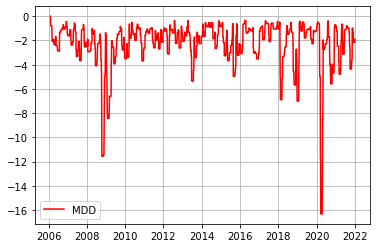

In [14]:
plt.plot(mdd.index, mdd, 'r', label='MDD')

plt.grid(True)
plt.legend(loc='best')
plt.show()